# 선형회귀의 과적합을 방지하는 규제
- Optimization 최적화 => 과적합
# Regularization 규제
# Lasso : L1
# Ridge : L2
# ElasticNet : 두개를 다 사용(L1,L2)
# CV : cross validation

  - 데이터를 일정한 사이즈로 분할
  - 모두가 train과 validation에 참여해서
  - 가장 적절한 parameter를 결정


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape

(442, 10)

In [ ]:
type(diabetes_y)
np.unique(diabetes_y)

array([ 25.,  31.,  37.,  39.,  40.,  42.,  43.,  44.,  45.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  57.,  58.,  59.,  60.,
        61.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  77.,  78.,  79.,  80.,  81.,  83.,  84.,  85.,
        86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
        97.,  98.,  99., 100., 101., 102., 103., 104., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 131., 132., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 150., 151., 152., 153., 154., 155., 156., 158., 160., 161.,
       162., 163., 164., 166., 167., 168., 170., 171., 172., 173., 174.,
       175., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 189., 190., 191., 192., 195., 196., 197., 198., 199., 200.,
       201., 202., 206., 208., 209., 210., 212., 21

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    diabetes_X,diabetes_y,random_state=0
)

regr=linear_model.LinearRegression() # default 값에 주의 - 상태
regr.fit(X_train,y_train) # 적합 학습 
diabetes_y_pred=regr.predict(X_test) 

print('Coefficients: \n',regr.coef_) # 기울기 
print('Mean squared error: %.2f' % mean_squared_error(y_test,diabetes_y_pred))
print('결정계수: %.2f' %r2_score(y_test,diabetes_y_pred))

Coefficients: 
 [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Mean squared error: 3180.16
결정계수: 0.36


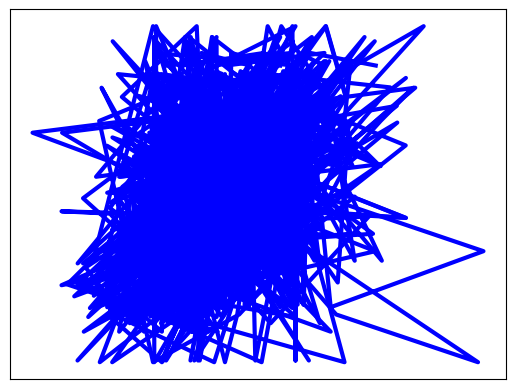

In [ ]:
import matplotlib.pyplot as plt
# X_test : ndarray
# plt.scatter(X_test[:,4],y_test,color='black')
plt.plot(X_test,diabetes_y_pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# 비 선형회귀

x=np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y=np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z=np.polyfit(x,y,3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X=np.arange(6).reshape(3,2) # 3x2
X
poly=PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
from sklearn.linear_model import Ridge # regularization 규제 (L2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def f(x):
  return x*np.sin(x)

In [ ]:
x_plot=np.linspace(0,10,100)
x=np.linspace(0,10,100)
rng=np.random.RandomState(0)
rng.shuffle(x)
x=np.sort(x[:20])
y=f(x)

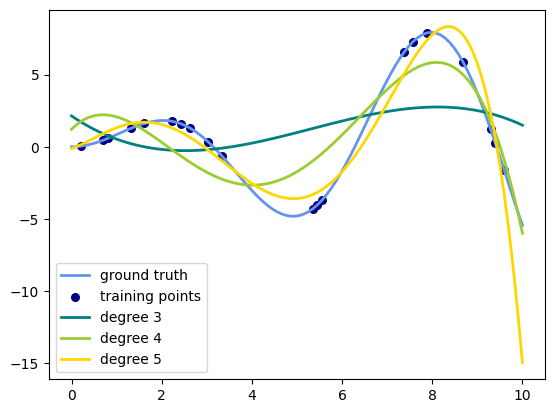

In [ ]:
# 열을 행으로 변경
X=x[:,np.newaxis] # 축의 추가 모델의 입력은 2차원 데이터
X_plot=x_plot[:,np.newaxis] # 평가 데이터
colors=['teal','yellowgreen','gold']
lw=2
plt.plot(x_plot,f(x_plot),color='cornflowerblue',linewidth=lw,label='ground truth')
plt.scatter(x,y,color='navy',s=30,marker='o',label='training points')
for count,degree in enumerate([3,4,5]): # 비선형회귀
  model=make_pipeline(PolynomialFeatures(degree),Ridge())
  # pipeline의 마지막은 model이 있어야함
  model.fit(X,y)
  y_plot=model.predict(X_plot)
  plt.plot(x_plot,y_plot,color=colors[count],linewidth=lw,label='degree %d' %degree)
plt.legend(loc='lower left')
plt.show()

In [ ]:
model=make_pipeline(PolynomialFeatures(3),Ridge())
model.fit(X,y)
y_plot=model.predict(X_plot)

In [ ]:
plt.plot(x_plot,y_plot)

In [ ]:
from sklearn.linear_model import LinearRegression
# 문제
X=[[0,0],[1,1],[2,2]]
y=[0,1,2]
# 위 데이터를 이용해서 선형회귀를 실시하시오

model = LinearRegression()
model.fit(X, y)

# 학습 결과 확인
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1.1102230246251565e-16
Coefficients: [0.5 0.5]


In [ ]:
x1,x2=0,0
y=model.intercept_+ model.coef_[0]*x1+model.coef_[1]*x2

print(y)

1.1102230246251565e-16


In [ ]:
# 문제
# 선형회귀 모델 만들기
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
california=fetch_california_housing()
type(california) # Bunch는 dictionary로 생성됨

sklearn.utils._bunch.Bunch

In [ ]:
california.target
california.target_names

['MedHouseVal']

In [ ]:
dfX = pd.DataFrame(data=california.data, columns=california.feature_names)
dfy = pd.DataFrame(california.target, columns=['price'])

In [ ]:
print(dfX.shape)
print(dfy.shape)

(20640, 8)
(20640, 1)


In [ ]:
model_california=linear_model.LinearRegression().fit(california.data,california.target)

In [ ]:
predictions=model_california.predict(california.data)

plt.scatter(california.target,predictions)
plt.xlabel(u'real')
plt.ylabel(u'predict')
plt.show

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
(1000000, 1)


<Axes: >

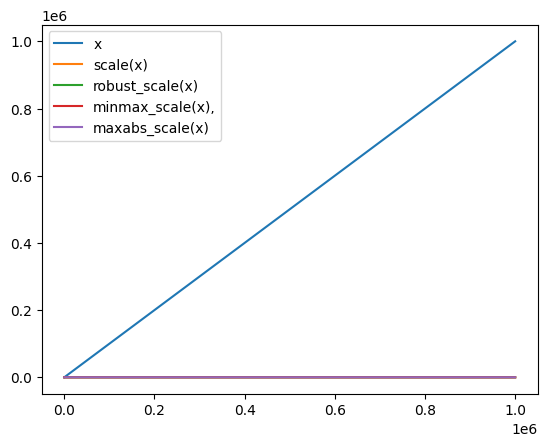

In [ ]:
from sklearn.preprocessing import scale,robust_scale,minmax_scale,maxabs_scale
print(np.arange(10,dtype=np.float64)-3)

x=(np.arange(1000000,dtype=np.float64)-3).reshape(-1,1)
print(x.shape)

df=pd.DataFrame(np.hstack([x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)]),
                columns=['x','scale(x)','robust_scale(x)','minmax_scale(x),','maxabs_scale(x)'])

df.plot()

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris
iris=load_iris()
print(type(iris))

data1=iris.data
print(data1.shape)
data2=scale(iris.data)
print('전처리전 평균:',np.mean(data1,axis=0))
print('전처리전 std:',np.std(data1,axis=0))
print('전처리후 mean',np.mean(data2,axis=0))
print('전처리후 std:',np.std(data2,axis=0))
# 븐류는 동일 -> 사이즈가 다름(+-)
sns.jointplot(data1[:,0]) # 양수 데이터
plt.show()
sns.jointplot(data2[:,0]) # 평균을 0점으로 +-
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data1)
data2=scaler.transform(data1)
data1.std(),data2.std()

(1.9738430577598278, 1.0)

In [ ]:
# 문제
# data3을 원래 데이터로 복원하고 표준편차를 구하시오
data3= scaler.fit_transform(data1)

# (data3*data1.std()+data1.mean()).std()
scaler.inverse_transform(data3).std()

1.9738430577598278

In [ ]:
# 문제 
# iris데이터에 대하여 minmax scalar class를 적용해보시오
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
iris = load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

ndf=minmax.fit_transform(df)

print(ndf)

In [ ]:
# 방향으로 정규화 normalize
from sklearn import preprocessing
X=[[1,-1,2],[2,0,0],[0,1,-1]]
X_normalized=preprocessing.normalize(X,norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
# class로 중복 구현한 이유는? => 크기값을 기억
# inverse transform 가능하다
normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
from sklearn.impute import SimpleImputer
# strategy : mean, median, most_frequent(최빈수), constant
imp_mean=SimpleImputer(missing_values=np.nan,strategy='median')
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])
X=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [ ]:
# K nearest neighbor (KNN)
from sklearn.impute import KNNImputer
X=[[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]]
imputer=KNNImputer(n_neighbors=3)
imputer.fit_transform(X)

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

In [ ]:
# 문제
# 결측치 처리하기
dict={'First':[100,90,np.nan,95],
      'Second':[30,45,56,np.nan],
      'Third':[np.nan,40,80,98]}
df=pd.DataFrame(dict)
imputer=KNNImputer(n_neighbors=1)
imputer.fit_transform(df)

array([[100.,  30.,  98.],
       [ 90.,  45.,  40.],
       [ 95.,  56.,  80.],
       [ 95.,  30.,  98.]])

In [ ]:
data_url='http://lib.stat.cmu.edu/datasets/boston'
raw_df=pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print(type(data))
boston_df=pd.DataFrame(data)
boston_df.head()

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
from scipy import stats
z=np.abs(stats.zscore(boston_df))
print(z.shape)
threshold=3
print(np.where(z>3))

(506, 13)
(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1

In [ ]:
Q1=boston_df.quantile(0.25)
Q3=boston_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(boston_df<(Q1-1.5*IQR))
print(boston_df>(Q3+1.5*IQR))

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64
        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  Fal

In [ ]:
boston_df=boston_df[(z<3).all(axis=1)]

In [ ]:
# 문제 : IQR 방식으로 이상치를 제거한 데이터를 추출하시오
Q1=boston_df.quantile(0.25)
Q3=boston_df.quantile(0.75)
IQR=Q3-Q1
boston_df[((boston_df>(Q1-1.5*IQR)) & (boston_df<(Q3+1.5*IQR))).any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
# 문제
# 이상치 제거하기
data=[1,2,2,2,3,1,1,15,2,2,2,3,1,1,2]

mean=np.mean(data)
std=np.std(data)
threshold=3
outlier=[]
for i in data:
  z=(i-mean)/std
  if z>threshold:
    outlier.append(i)
print('이상치 데이터: ',outlier)

이상치 데이터:  [15]


In [ ]:
from sklearn.preprocessing import scale
data2=scale(data)
np.array(data)[data2>3]

array([15])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
X=np.array([[2],[3],[4],[2],[4]])
ohe.fit(X)
ohe.categories_

[array([2, 3, 4])]

In [ ]:
print(ohe.transform(X))
print ('--------------')
print(ohe.transform(X).toarray())

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 2)	1.0
--------------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
print(ohe.transform([X[0]]).toarray())

[[1. 0. 0.]]


In [ ]:
# 문제
# [['서울'],['서울'],['대전'],['부산']]
# 위 데이터 원핫인코딩
ohe=OneHotEncoder()
location=[['서울'],['서울'],['대전'],['부산']]
ohe.fit(location)

print(ohe.transform(location).toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
ohe=OneHotEncoder()
X=np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]])
ohe.fit(X)
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [ ]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [ ]:
ohe.inverse_transform([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 3]])

In [ ]:
# 문제
# X=[['Male'],1],['Female',2],['Female',3]] 
# 위 데이터를 onehot encoding
ohe=OneHotEncoder()
X=[['Male',1],['Female',2],['Female',3]]
ohe.fit(X)
ohe.transform(X).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [ ]:
# 레이블 범주화
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit([1,2,2,6])
le.classes_

array([1, 2, 6])

In [ ]:
le.inverse_transform([0,0,1,2])

array([1, 1, 2, 6])

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v=DictVectorizer(sparse=False)
D=[{'foo':1,'bar':2},{'foo':3,'baz':1}]
X=v.fit_transform(D)
X
# 키 모으기
# [bar,baz,foo] # 텍스트 마이닝 DTM(document term matrix), TDM

array([[2., 0., 1.],
       [0., 1., 3.]])

In [ ]:
v.feature_names_

['bar', 'baz', 'foo']

In [ ]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [ ]:
from pandas import DataFrame, Series
from itertools import cycle
area = '서울 부산 대구 인천 광주 대전 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주'.split() 
college = '인문대학 사회과학대학 자연과학대학 간호대학 경영대학 공과대학 미술대학'.split()
gender = '남성 여성'.split()
fake_data=zip(range(100),cycle(area),cycle(college),cycle(gender))
hundred_students=DataFrame([data for num, *data in fake_data],columns='지역 단과대 성별'.split())
hundred_students.head(10)

,지역,단과대,성별
0,서울,인문대학,남성
1,부산,사회과학대학,여성
2,대구,자연과학대학,남성
3,인천,간호대학,여성
4,광주,경영대학,남성
5,대전,공과대학,여성
6,울산,미술대학,남성
7,세종,인문대학,여성
8,경기,사회과학대학,남성
9,강원,자연과학대학,여성


In [ ]:
# 범주형 데이터 7개의 범주 -> 7개의 변수 변환 
college_one_hot_encoded=pd.get_dummies(hundred_students.단과대)
college_one_hot_encoded

,간호대학,경영대학,공과대학,미술대학,사회과학대학,인문대학,자연과학대학
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,1,0,0,0,0,0
96,0,0,1,0,0,0,0
97,0,0,0,1,0,0,0
98,0,0,0,0,0,1,0


In [ ]:
# 17+7+2 => 26개의 변수로 변화
# 120개의 one hot encoding => 회귀분석: 2개 이상의 범주형 변수가 있으면 안됨
# 신경망에서 범주형 데이터 => one-hot-encoding
# 신경망은 반드시 정규화
# 1,2,6 종류일 뿐인데 크기에 영향을 주면 안된다.
pd.get_dummies(hundred_students,prefix=['지역','단과대','성별']).head()

,지역_강원,지역_경기,지역_경남,지역_경북,지역_광주,지역_대구,지역_대전,지역_부산,지역_서울,지역_세종,...,지역_충북,단과대_간호대학,단과대_경영대학,단과대_공과대학,단과대_미술대학,단과대_사회과학대학,단과대_인문대학,단과대_자연과학대학,성별_남성,성별_여성
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# feature_selection 변수 선택법
# 변수 중요도에 따라 선택-> 과적합의 위험, 노이즈 역할
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE # recursive(재귀적) feature eliminate
from sklearn.svm import SVR # 가장 강력한 모델 : support vector machine
                      # SVC # classifier
                      # 고 차원을 좋아하는 모델
# 2차 서포트벡터
X,y=make_friedman1(n_samples=50,n_features=5,random_state=0) # 50x5
# 리눅스에서 핵심 os : kernel
estimator=SVR(kernel='linear')
selector=RFE(estimator)
selector=selector.fit(X,y)
selector.support_

# 분산이 작은 변수: 안 좋은 변수


array([False, False, False,  True,  True])

In [ ]:
selector.ranking_

array([3, 2, 4, 1, 1])

# 변수 선택법
- 모델로 하는 경우 : Tree 분석( 변수 중요도: variable importance). 데이터 구조 확인
- PCA : principal component analysis 주성분분석: 상관계수행렬, 공분산행렬 => 
고유값 분해(고유치, 고유벡터) -> 
- 고유벡터: 정직교하는 행렬(축행렬), 고유치는 축 방향으로의 분산의 크기

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X=[[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]] # 6x3
sel=VarianceThreshold(threshold=(0.15))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X,y=load_iris(return_X_y=True)
print('원본',X.shape)

X_new=SelectKBest(chi2,k=2).fit_transform(X,y)
X_new.shape

원본 (150, 4)


(150, 2)